
<div style = "text-align : center">
    <center><font size = 13> KNN Regression </font></center>
    <img src = "./img/knn_reg.PNG"> 
</div>

<br><br>

<div  style="text-align: right">
    <font size = 7 > 19/04/05 이성령 </font>
</div>

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
import sys
import numpy as np
from scipy.spatial.distance import cdist
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn import linear_model
from mpl_toolkits.mplot3d import axes3d


regr = linear_model.LinearRegression()
init_notebook_mode(connected=True)
np.set_printoptions(threshold=np.inf)


In [2]:
b0 , b1 = 0.5 , 4
train_n  = 200
x = np.random.uniform(high=1, low=-1, size= train_n )
x = np.sort(x)
true = b0 + b1 * x
y = true+ np.random.normal(loc=0 , scale= 1, size = train_n)
regr.fit( x.reshape(-1,1)  , y.reshape(-1,1))
y_hat = regr.coef_ * x +  regr.intercept_
dist = cdist(x.reshape(-1,1) , x.reshape(-1,1) )

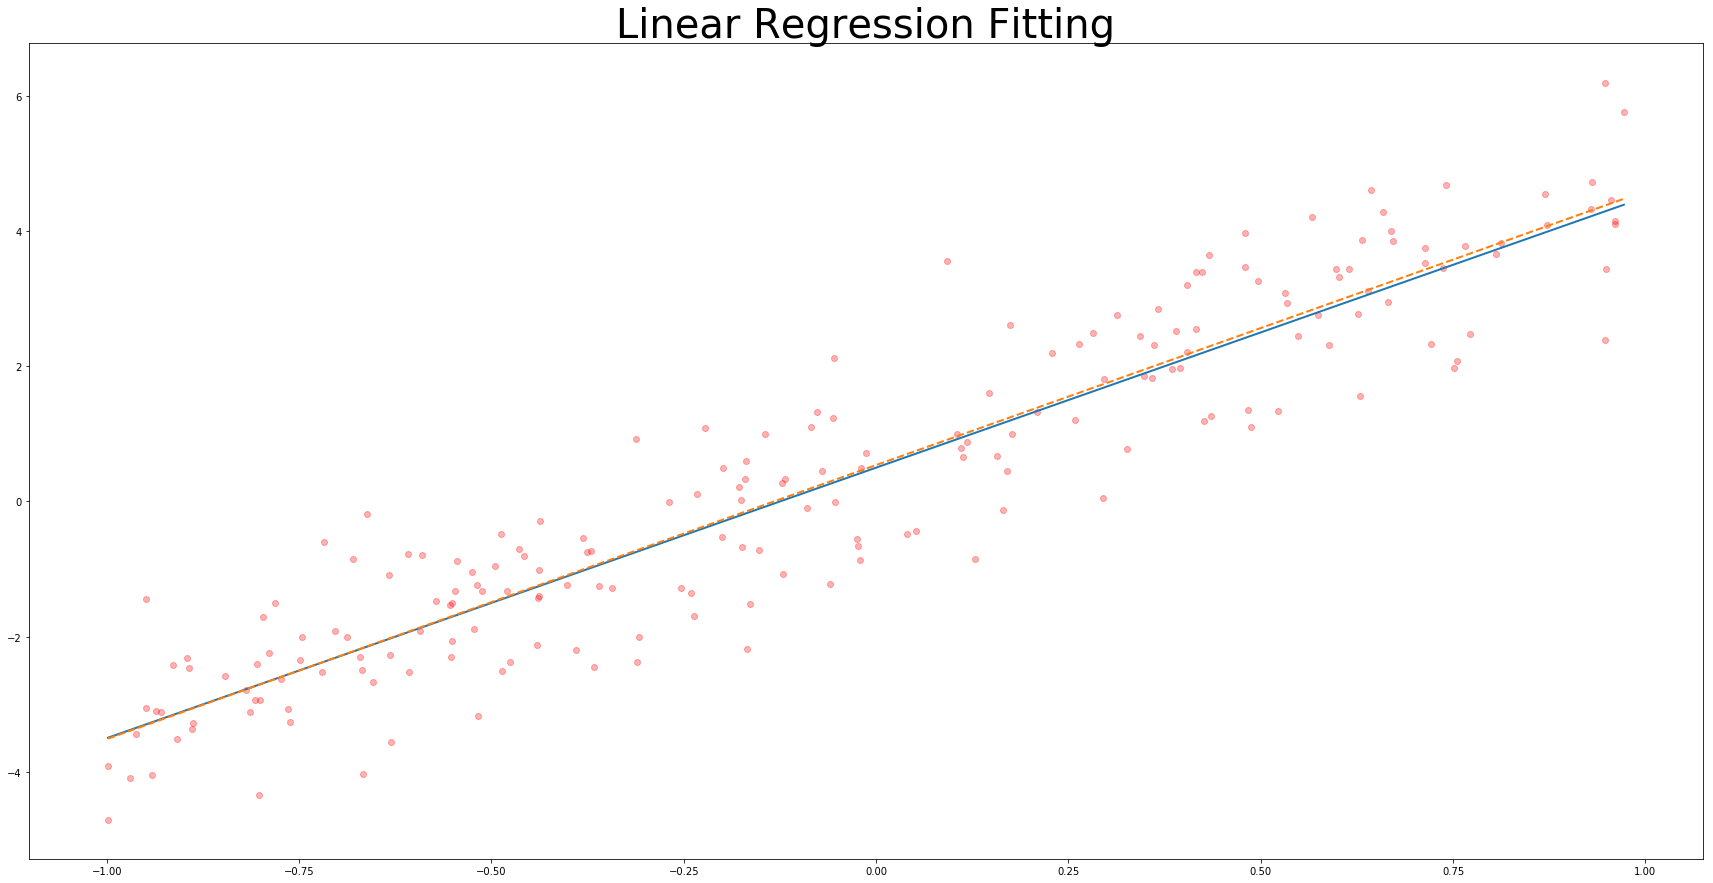

In [3]:
plt.figure(figsize = (30, 15))
plt.plot(x, true , linewidth = 2  , linestyle = "-")
plt.plot(x, y_hat[0] , linewidth = 2, linestyle = "--")
plt.scatter(x , y, color = "red" , alpha=0.3 )
plt.title("Linear Regression Fitting", fontsize = 40)
plt.show()

In [4]:
def line_knn_plot(i , x,  true , y_hat, sub) :
    y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
    knn_regr = np.mean(y.reshape(-1,1)[y_index] , axis = 1)
    ax[sub].plot(x, knn_regr , linewidth = 2 , linestyle='--', drawstyle='steps')
    ax[sub].plot(x, true , linewidth = 2  , linestyle = "-")
    ax[sub].plot(x, y_hat[0] , linewidth = 2, linestyle = "--")
    ax[sub].scatter(x , y, color = "red" , alpha=0.9 )
    ax[sub].set_title("Linear Regression Fitting K = {}".format(i), fontsize= 40)
    ax[sub].axis("off")

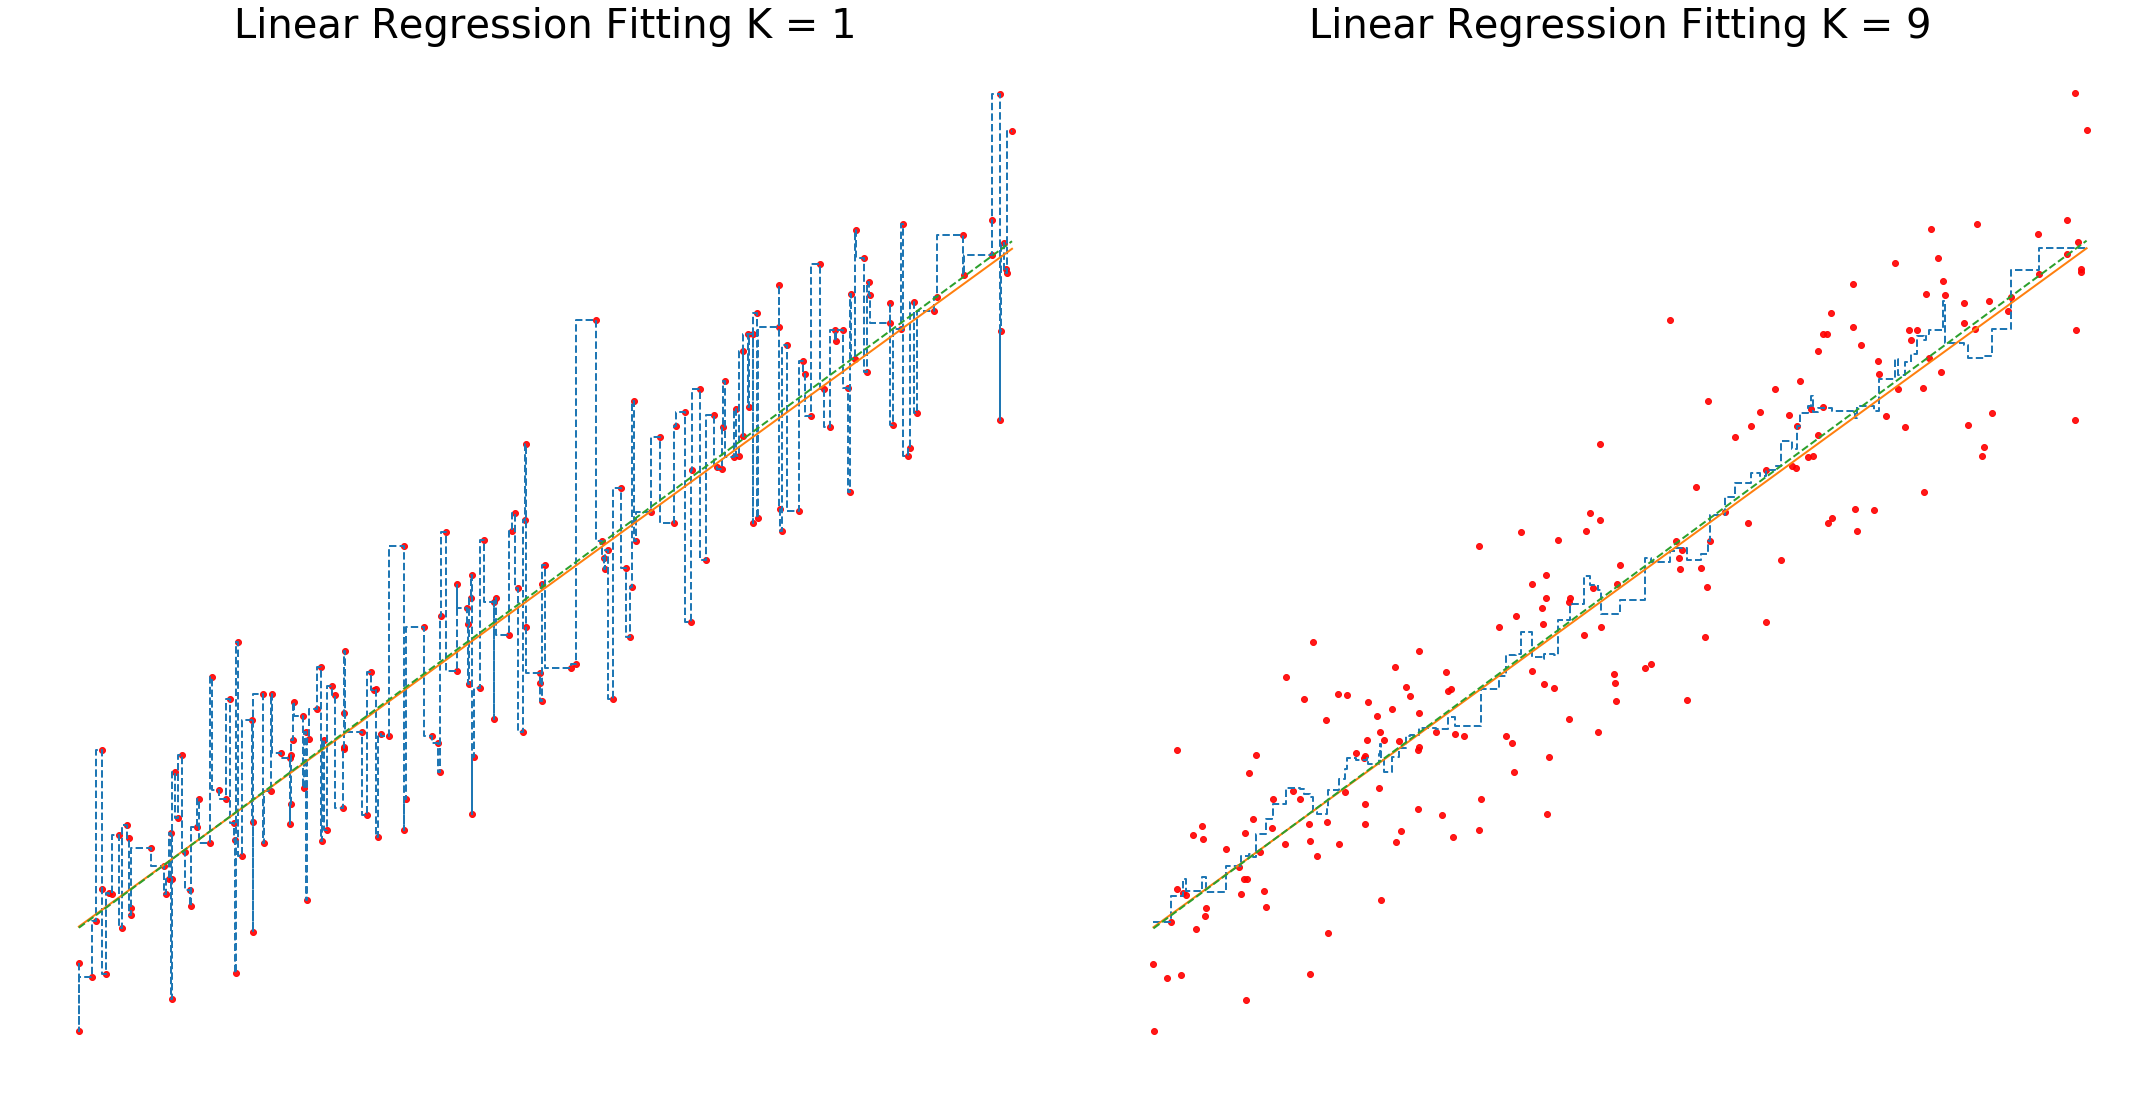

In [5]:
fig, ax = plt.subplots(1 , 2 , figsize = (30, 15))
fig.tight_layout()
sub = 0
for i in [1, 9] : 
    line_knn_plot(i , x , true , y_hat , sub )
    sub +=1
plt.show()

In [6]:
test_size = 2000
test_x = np.random.uniform(high=1, low=-1, size= test_size)
test_x = np.sort(test_x)
test_true = b0 + b1 * test_x
test_y = test_true+ np.random.normal(loc=0 , scale= 1, size=test_size)
dist = cdist(test_x.reshape(-1,1) , x.reshape(-1,1) )

In [7]:
step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [3] + step
step = list(np.sort(step))

In [8]:
test_mse = []
for i in step : 
    y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
    knn_regr = np.mean(y.reshape(-1,1)[y_index] , axis = 1)
    mse = np.mean(np.square(test_y.reshape(-1,1) - knn_regr))
    test_mse.append(mse)

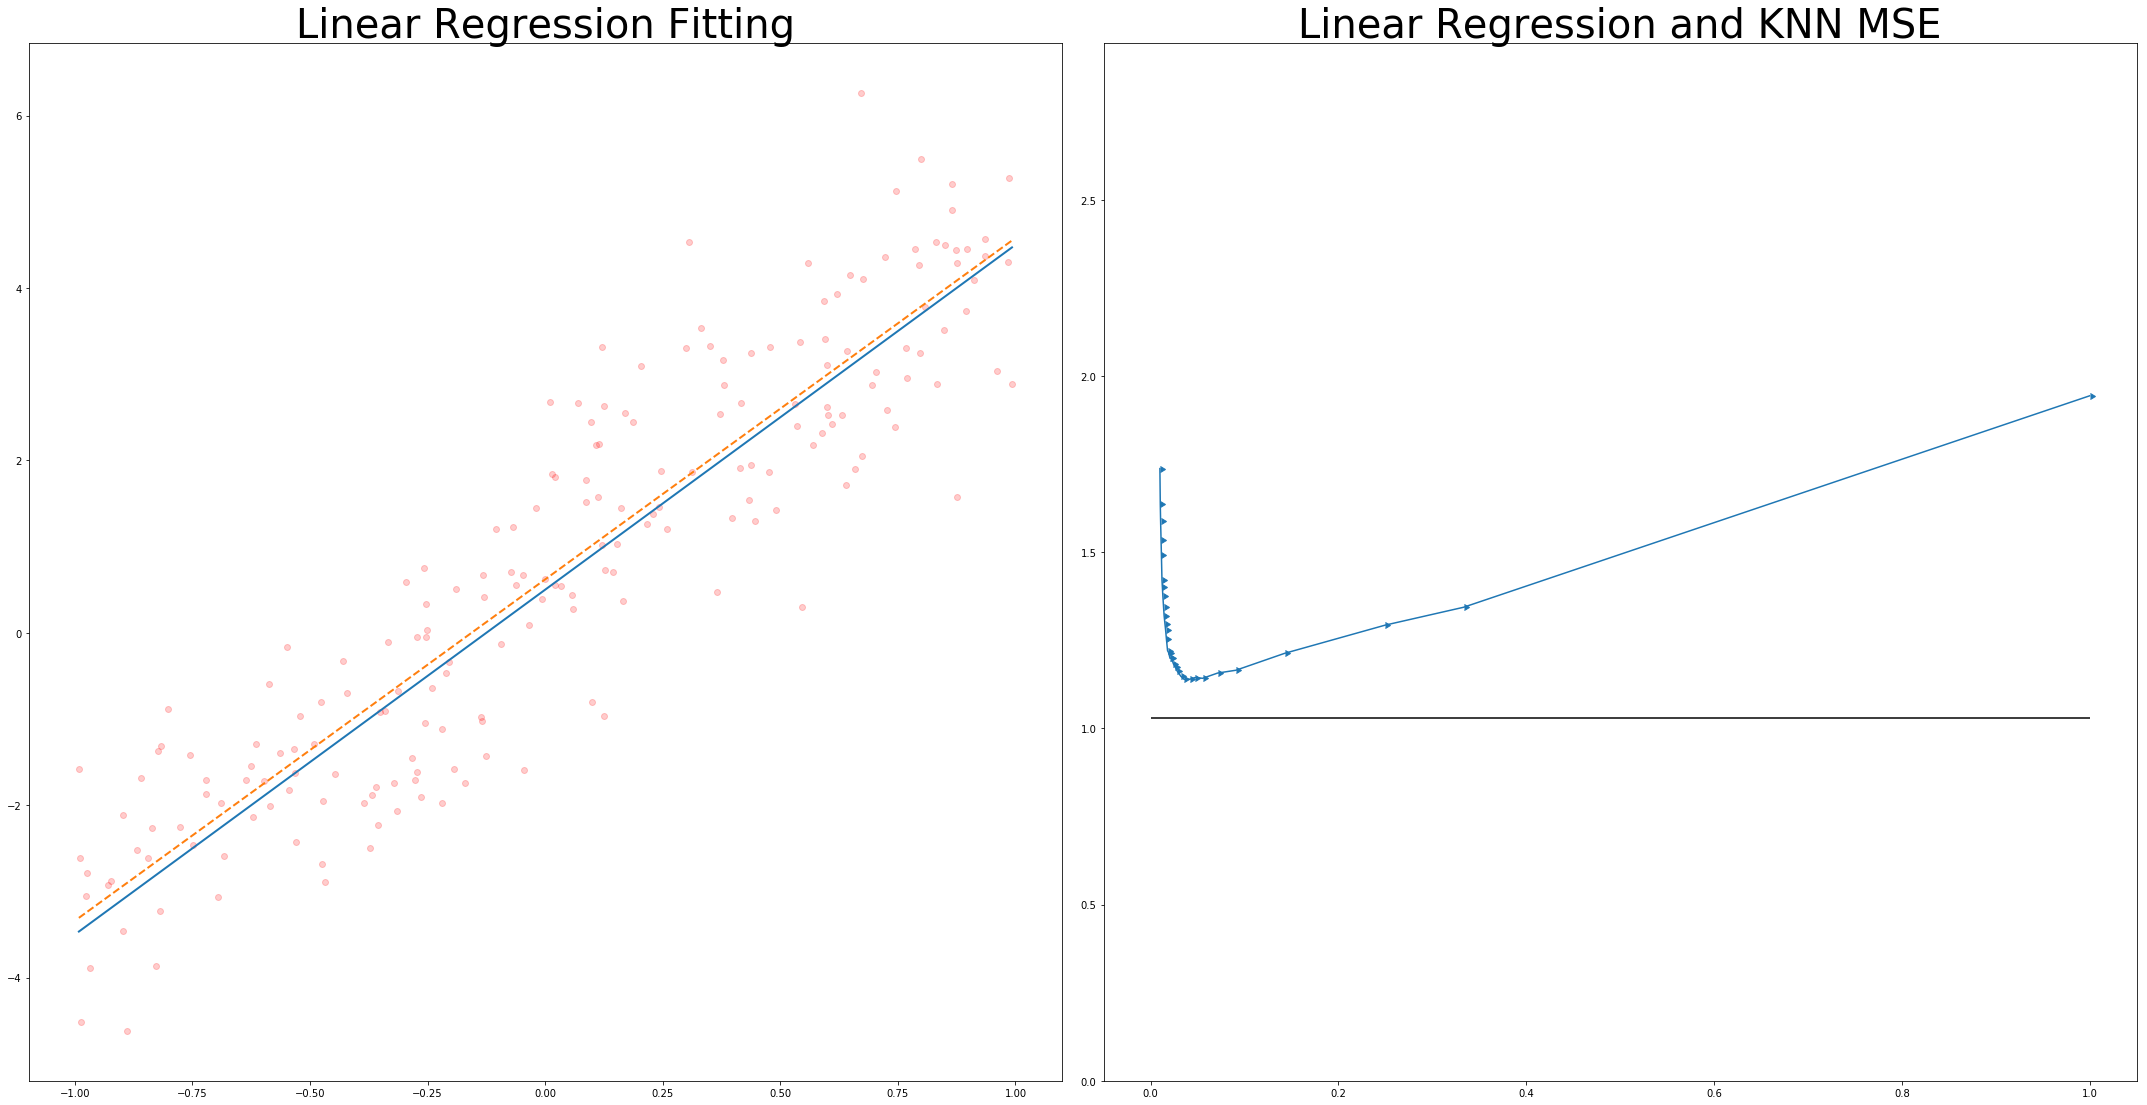

In [9]:
fig, ax = plt.subplots(1 , 2 , figsize = (30, 15))
fig.tight_layout()
sub = 0
ax[sub].plot(x, true , linewidth = 2  , linestyle = "-")
ax[sub].plot(x, y_hat[0] , linewidth = 2, linestyle = "--")
ax[sub].scatter(x , y, color = "red" , alpha=0.2)
ax[sub].set_title("Linear Regression Fitting" , fontsize= 40)
sub = 1
ax[sub].plot(1/np.array(step), test_mse , marker = 9)
linear_mse = np.mean( np.square(test_y.reshape(-1,1) - 
                                regr.predict(test_x.reshape(-1,1)) ))
ax[sub].hlines(linear_mse , xmin = 0 , xmax = 1)
ax[sub].set_ylim([0, np.max(test_mse)+1])
ax[sub].set_title("Linear Regression and KNN MSE", fontsize= 40)
plt.show()


<div style = "text-align : center">
    <center><font size = 13> KNN Curve Regression </font></center>
    <img src = "./img/knn_curve_reg.PNG"> 
</div>

<br><br>

<div>
    <center><font size = 5> $y= sin(4x) + 7x + \epsilon$ </font></center>
    <center><font size = 5> $\epsilon \sim N(0,1)$ </font></center>
    </div>

In [10]:
def visual_2( x, y,  true , y_hat , knn_regr_1 , knn_regr_10 , step , test_mse , test_x , test_y) :
    fig, ax = plt.subplots(1 , 2 , figsize = (30, 15))
    fig.tight_layout()
    sub = 0
    ax[sub].plot(x, true)
    ax[sub].plot(x, y_hat[0])
    ax[sub].plot(x, knn_regr_1, linestyle='--', drawstyle='steps')
    ax[sub].plot(x, knn_regr_10, linestyle='--', drawstyle='steps')
    ax[sub].scatter(x, y)
    sub = 1
    ax[sub].plot(1/np.array(step), test_mse , marker = 9)
    linear_mse = np.mean(np.square(test_y.reshape(-1,1) - regr.predict(test_x.reshape(-1,1)) ))
    ax[sub].hlines( linear_mse , xmin = 0 , xmax = 1)
    plt.show()

In [11]:
def nonlinear_1(x ) :
    true = np.sin(4*x) + 7 *x
    y = true + np.random.normal(loc=0 , scale= 1, size = len(x))
    return true , y

train_n  = 200
x = np.random.uniform(high=1, low=-1, size= train_n )
x = np.sort(x)
true , y= nonlinear_1(x)
regr.fit( x.reshape(-1,1) , y.reshape(-1,1))
y_hat = regr.coef_ * x +  regr.intercept_

i = 1 
dist = cdist(x.reshape(-1,1) , x.reshape(-1,1) )
y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
knn_regr_1 = np.mean(y.reshape(-1,1)[y_index] , axis = 1)
i = 10
y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
knn_regr_10 = np.mean(y.reshape(-1,1)[y_index] , axis = 1)


In [12]:
test_size = 2000
test_x = np.random.uniform(high=1, low=-1, size= test_size)
test_x = np.sort(test_x)
test_true , test_y = nonlinear_1(test_x)
dist = cdist(test_x.reshape(-1,1) , x.reshape(-1,1) )

step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [3] + step
step = list(np.sort(step))

first_test_mse = []
for i in step : 
    y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
    knn_regr = np.mean(y.reshape(-1,1)[y_index] , axis = 1)
    mse = np.mean(np.square(test_y.reshape(-1,1) - knn_regr))
    first_test_mse.append(mse)

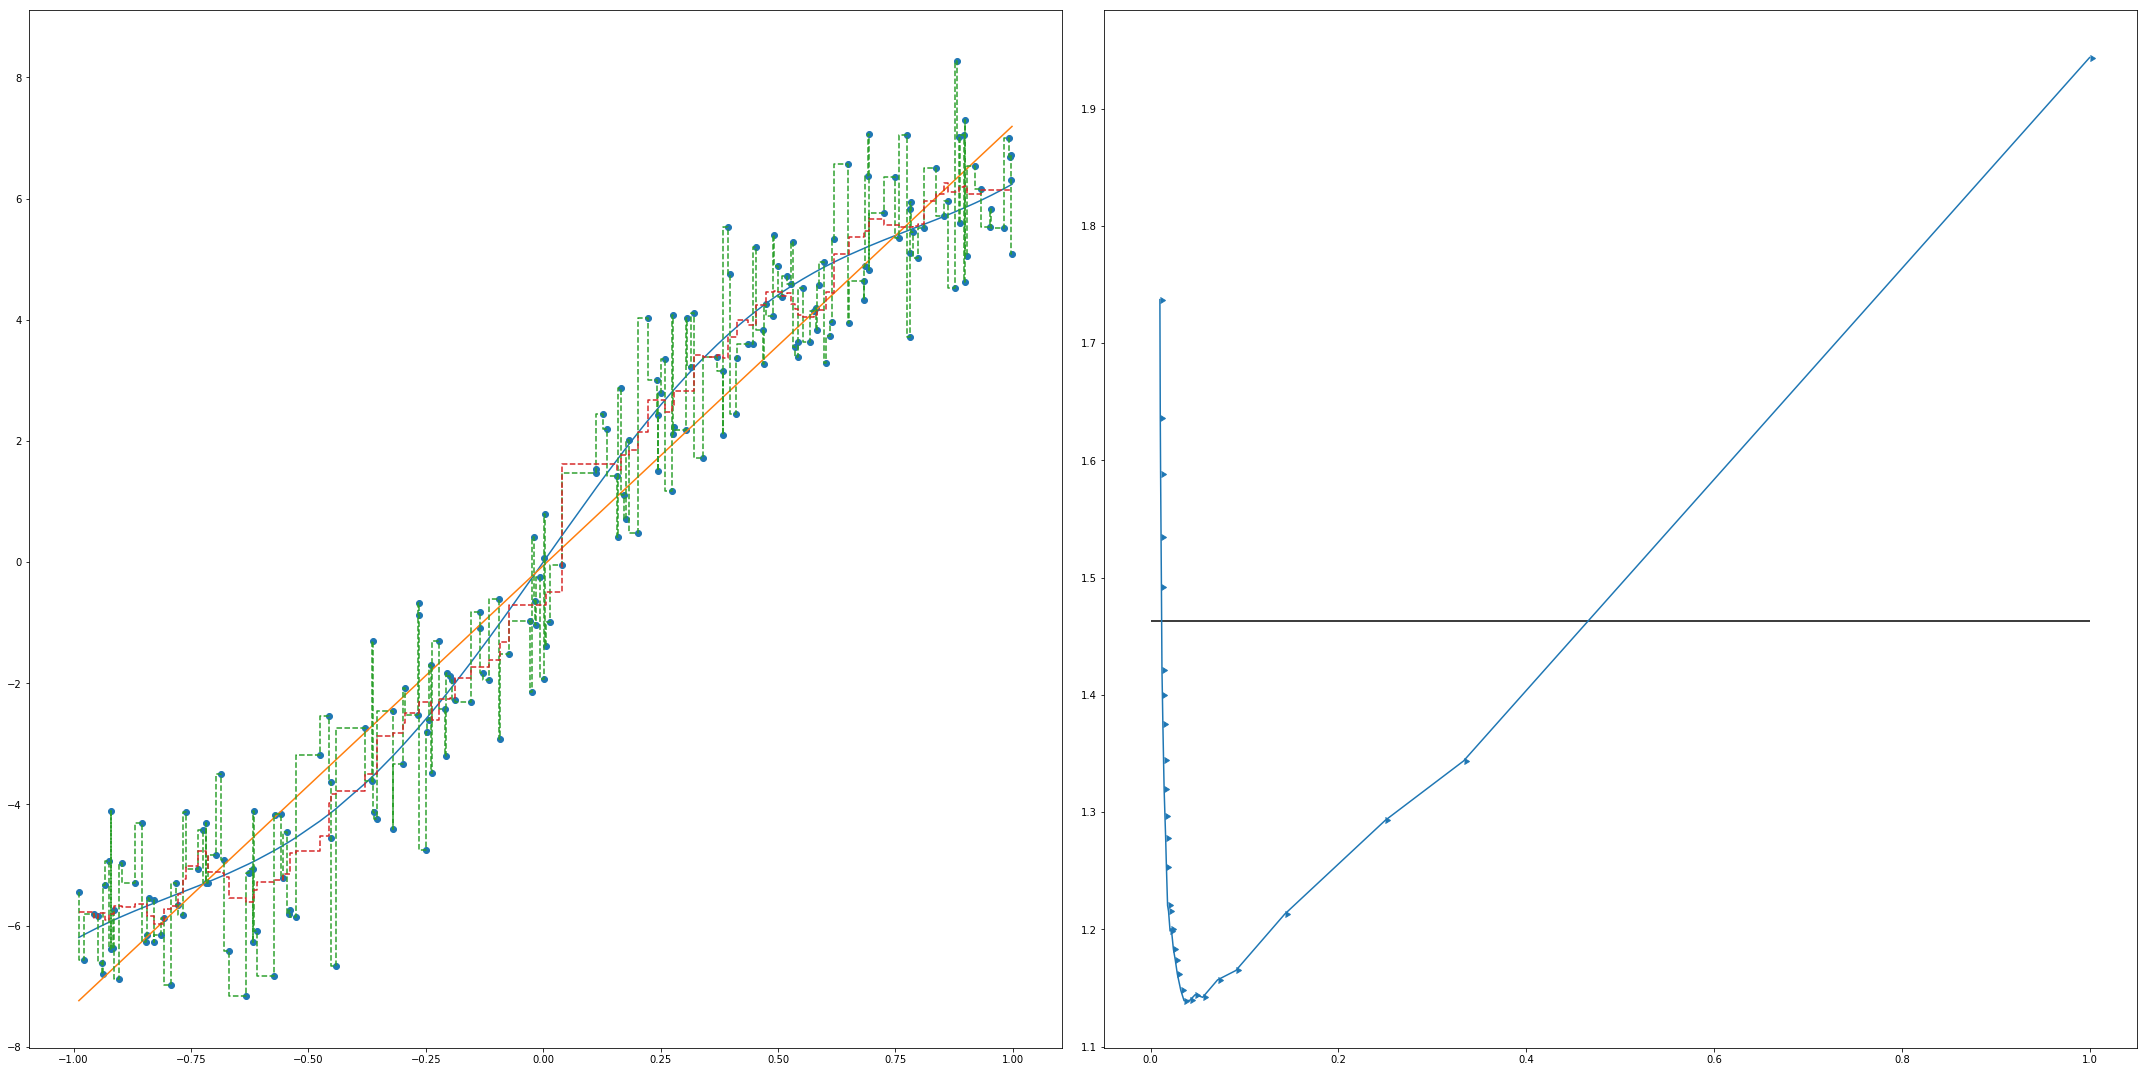

In [13]:
visual_2( x, y,  true , y_hat , knn_regr_1 , knn_regr_10 ,
         step , test_mse , test_x , test_y)

<div>
    <center><font size = 10> Nonlinear Regression </font></center>
    <center><font size = 5> $y= 5*sin(5x) + 30x + \epsilon$ </font></center>
    <center><font size = 5> $\epsilon \sim N(0,3^2)$ </font></center>
    </div>

In [14]:
def nonlinear_2(x ) :
    true = 5.0 * np.sin( 5 * x) + 10 * x
    y = true + np.random.normal(loc=0 , scale= 3, size = len(x))
    return true , y
train_n  = 200
x = np.random.uniform(high=1, low=-1, size= train_n )
x = np.sort(x)
true , y = nonlinear_2(x ) 
regr.fit( x.reshape(-1,1) , y.reshape(-1,1))
y_hat = regr.coef_ * x +  regr.intercept_
dist = cdist(x.reshape(-1,1) , x.reshape(-1,1) )
i = 1 
y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
knn_regr_1 = np.mean(y.reshape(-1,1)[y_index] , axis = 1)
i = 10
y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
knn_regr_10 = np.mean(y.reshape(-1,1)[y_index] , axis = 1)

In [15]:
test_size = 2000
test_x = np.random.uniform(high=1, low=-1, size= test_size)
test_x = np.sort(test_x)
test_true , test_y = nonlinear_2(test_x ) 
dist = cdist(test_x.reshape(-1,1) , x.reshape(-1,1) )

step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [3] + step
step = list(np.sort(step))

first_test_mse = []
for i in step : 
    y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
    knn_regr = np.mean(y.reshape(-1,1)[y_index] , axis = 1)
    mse = np.mean(np.square(test_y.reshape(-1,1) - knn_regr))
    first_test_mse.append(mse)

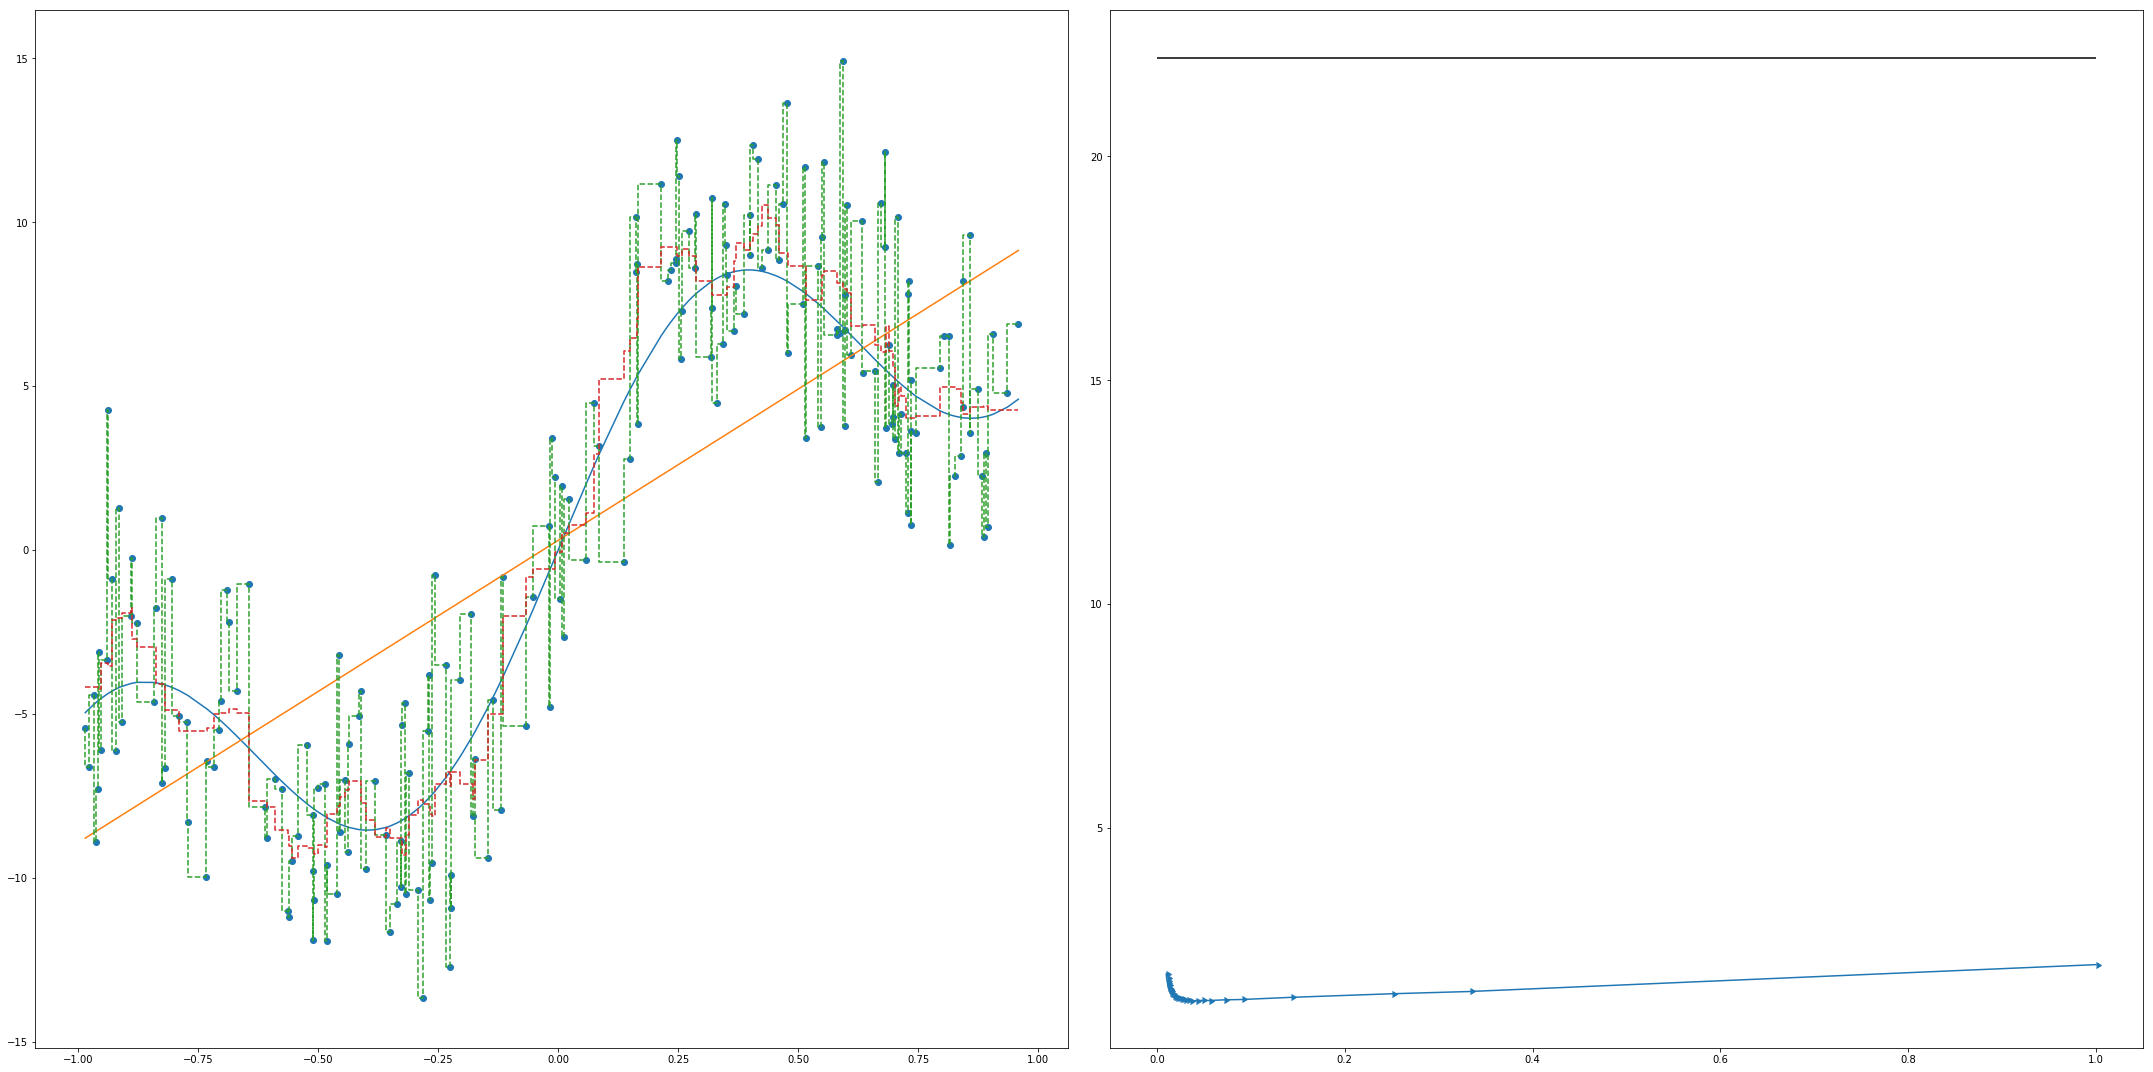

In [16]:
visual_2( x, y,  true , y_hat , knn_regr_1 , knn_regr_10 ,
         step , test_mse , test_x , test_y)

<div>
    <center><font size = 10> Nonlinear Regression </font></center>
    <center><font size = 5>True :  $y= sin( 5 x) + 10 x + \epsilon$ </font></center>
    <center><font size = 5> $\epsilon \sim N(0,1^2)$ </font></center>
    <center><font size = 5> X = $x_1, x_2 , ... ,x_p$ (p=1,2,3,4,10,15,20)</font></center>
    </div>

In [17]:
def nonlinear_3(x) :
    true = np.sin( 5 * x) + 10 * x
    y = true + np.random.normal(loc=0 , scale= 1, size = len(x))
    return true , y

def curse_of_dim(x , train_n , p , f) :
    true , y  = f(x)
    x = x.reshape(-1,1)
    if p == 1 :
        x = x
    else :
        for i in np.arange(1 , p) :
            curse_p = np.random.normal(loc = 0 , scale= 1 , size=[train_n,1])
            x = np.concatenate( (x ,  curse_p), axis = 1)
    return x , true , y.reshape(-1,1)

In [18]:
def curse_of_dim_eff( test_n = 2000 , train_n = 200, p_n =None , f2 = nonlinear_3 , step_n = 30) :
    train_x = np.sort(np.random.uniform(high=1, low=-1, size= train_n ))
    x_p , true , y = curse_of_dim( train_x, train_n , p = p_n , f = f2)
    regr.fit( x_p  , y)
    linear_mse_p = np.mean(np.square(y - regr.predict(x_p)))
    test_x = np.sort(np.random.uniform(high=1, low=-1, size= test_n ))
    test_p , test_true , test_y = curse_of_dim( test_x, test_n , p = p_n , f = f2)
    dist = cdist(test_p, x_p )
    step = np.linspace(1, 100 , num= step_n).astype(int).tolist()
    step = [3] + step
    step = list(np.sort(np.unique(step)))

    second_test_mse = []
    for i in step : 
        y_index = np.argpartition(dist, np.argmin(dist, axis=1))[:, :i]
        knn_regr = np.mean(y.reshape(-1,1)[y_index] , axis = 1)
        mse = np.mean(np.square(test_y.reshape(-1,1) - knn_regr))
        second_test_mse.append(mse)
    return step , second_test_mse , p_n , linear_mse_p

In [19]:
def p_eff_plot(sub , step , second_test_mse , p_n , linear_mse_p) :
    ax[sub].plot(1/np.array(step), second_test_mse, linestyle='--' , color ="green")
    ax[sub].hlines(linear_mse_p , xmin = 0 , xmax = 1 , linestyle='--')
    ax[sub].set_title("P = {}".format(p_n), fontsize= 40)
    ax[sub].set_ylim(0, 50)

In [24]:
x  = np.sort(np.random.uniform(high=1 , low=-1, size = [100]))
true , y = nonlinear_3(x)
regr.fit(x.reshape(-1,1) , y)
lm = regr.predict(x.reshape(-1,1))

trace = go.Scatter(
    x = x,
    y = true,
    mode = 'lines+markers',
    name ='NonLinear Regression',
)
trace2 = go.Scatter(
    x = x,
    y = lm,
    mode = 'lines+markers',
    name ='Linear Regression',
)
data = [trace , trace2 ]
layout = dict(title = 'EX',
              xaxis = dict(title = 'x'),
              yaxis = dict(title = 'y'),
              width=1000,
              height=700,
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='basic-line')

/usr/local/lib/python3.5/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



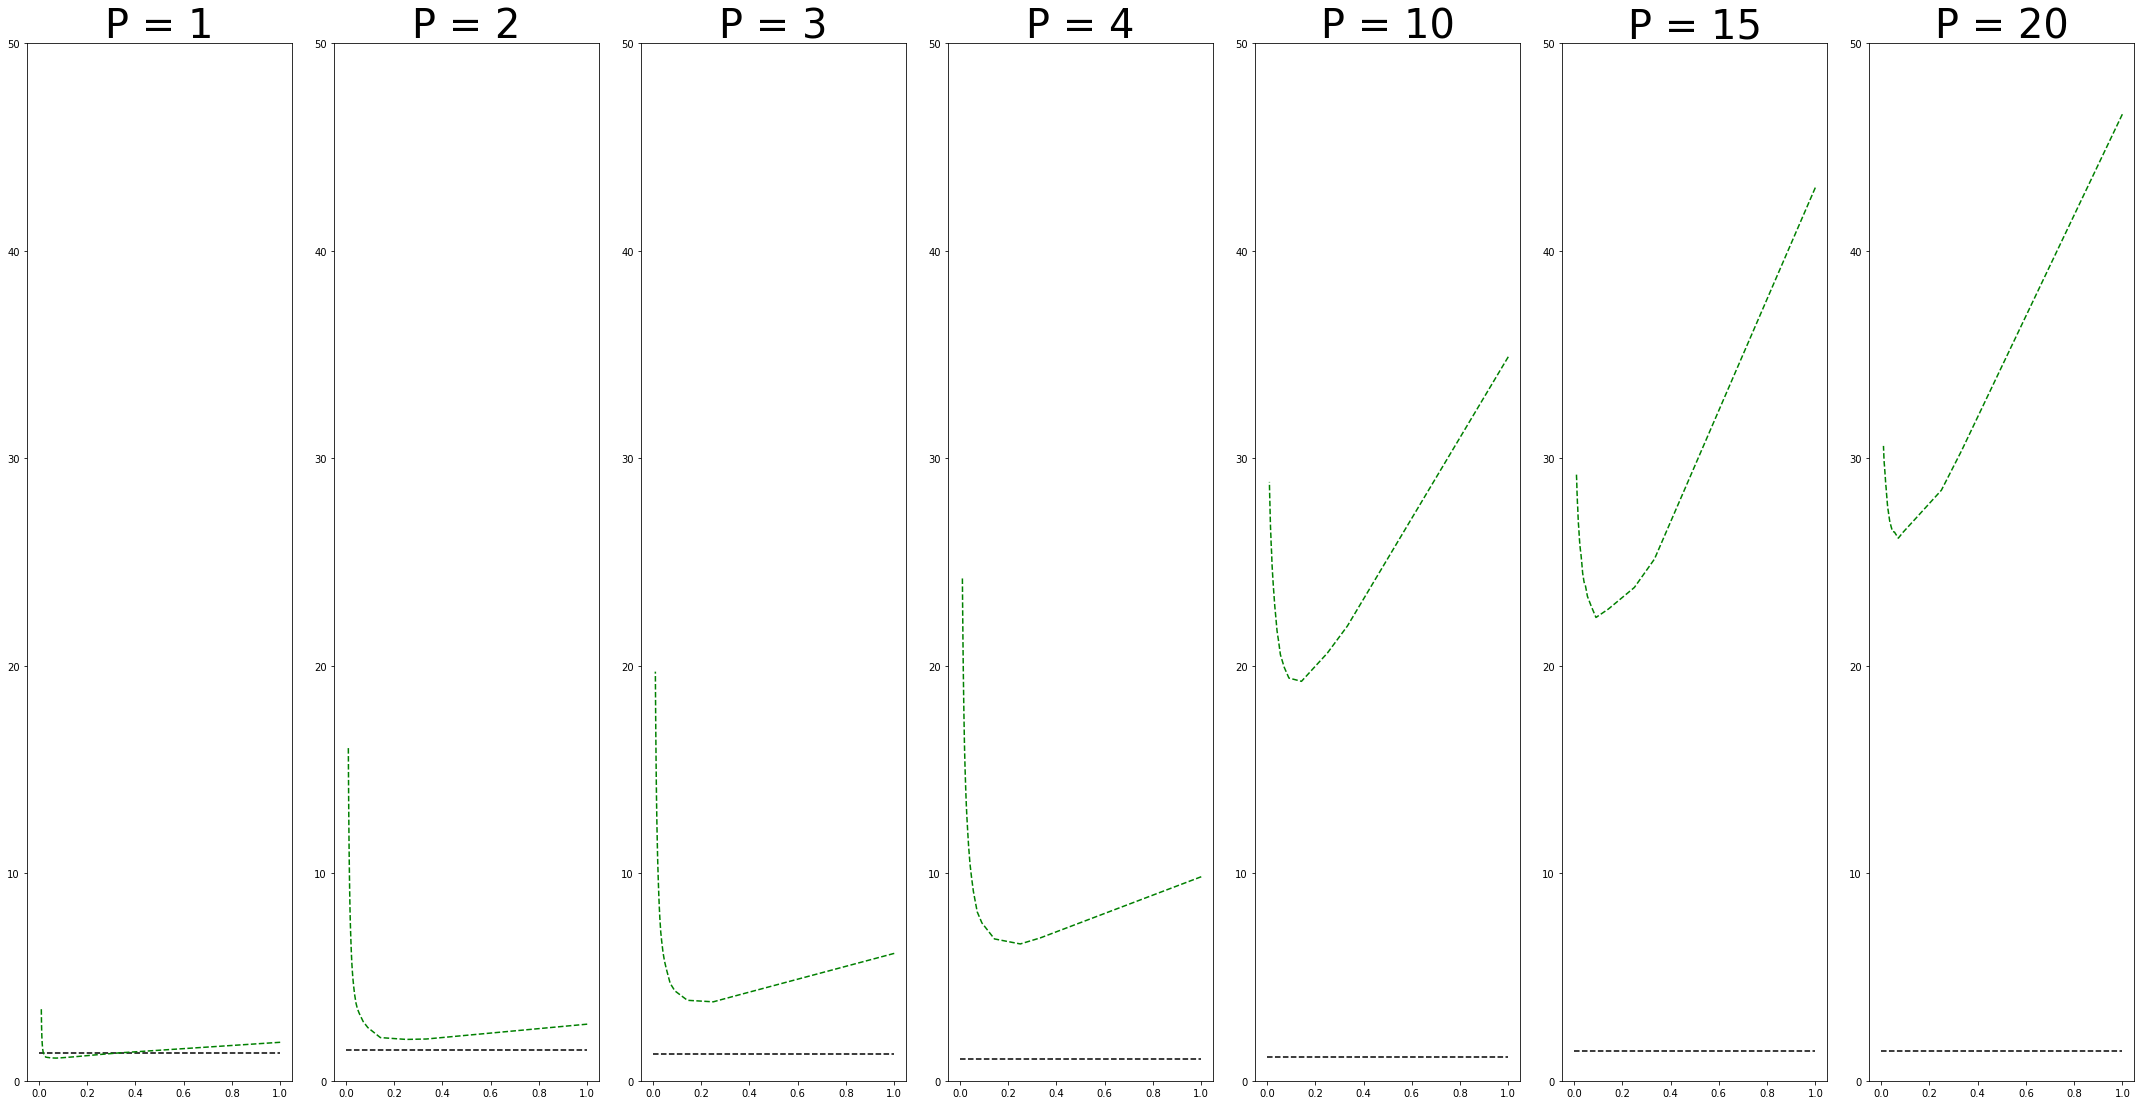

In [181]:
p_n = [1,2,3,4,10,15,20]
#fig, ax = plt.subplots(1 , len(p_n) , figsize = (30, 15))
#fig.tight_layout()
fig = tools.make_subplots(rows=1, cols=len(p_n), 
                          subplot_titles=('Plot 1', 'Plot 2',
                                          'Plot 3', 'Plot 4'))
sub = 0
for i in p_n : 
    step , second_test_mse , p_n , linear_mse_p = \
    curse_of_dim_eff(test_n = 2000 , train_n = 200,
                     p_n = i , f2 = nonlinear_3 , step_n = 30)
    p_eff_plot(sub , step , second_test_mse , p_n , linear_mse_p)
    sub +=1
plt.show()

In [55]:
from plotly import tools

p_n = [1,2,3,4,10,15,20]
p_name = [ "P = "+ str(i) for i in p_n ]
fig = tools.make_subplots(rows=1, cols=len(p_n), subplot_titles = tuple(p_name))
sub = 1
for i in p_n : 
    step , second_test_mse , p_n , linear_mse_p = \
    curse_of_dim_eff(test_n = 2000 , train_n = 200,
                     p_n = i , f2 = nonlinear_3 , step_n = 30)
    step_reverse = list(1 / np.array(step))
    trace1 = go.Scatter(x= step_reverse ,
                        y=second_test_mse)
    trace_line = go.Scatter(
        x= step_reverse,
        y= [linear_mse_p] * len(step), mode ='lines')
    fig.append_trace(trace1, 1, sub)
    fig.append_trace(trace_line, 1, sub)
    sub +=1
    
fig['layout'].update(showlegend=False , 
                     yaxis=dict(range=[0, 50]) ,
                     height=500, width=1000, 
                     title='Comparison of Linear Regression with K-Nearest Neighbors')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]  [ (1,5) x5,y5 ]  [ (1,6) x6,y6 ]  [ (1,7) x7,y7 ]



In [56]:
import plotly.offline as pyo
pyo.iplot(fig)

In [35]:
x1 = np.sort(np.random.uniform(low=-5 , high=5 , size = [100,1]))
x2 = np.sort(np.random.uniform(low=-5 , high=5 , size = [100,1]))
y = np.sin(np.pi*x1) + np.sin(np.pi*x2) + 5*x1+ 5*x2 + np.random.normal(loc=0 , scale=1 , size = [100,1])

x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
X_1 = np.linspace(x_min , x_max , num = 100)
X_2 = np.linspace(y_min, y_max  , num = 100)
X1 , X2 = np.meshgrid(X_1,X_2)

In [36]:
grid_xy = np.concatenate(
    (X1[:, : , np.newaxis],X2[:, : , np.newaxis]),
    axis = 2)

In [37]:
reshape_grid = grid_xy.reshape(100*100 , 2)

In [38]:
var_grid = np.concatenate((x1,x2) , axis = 1)

In [39]:
metric = "euclidean"
dist = cdist( reshape_grid, var_grid, metric=metric )

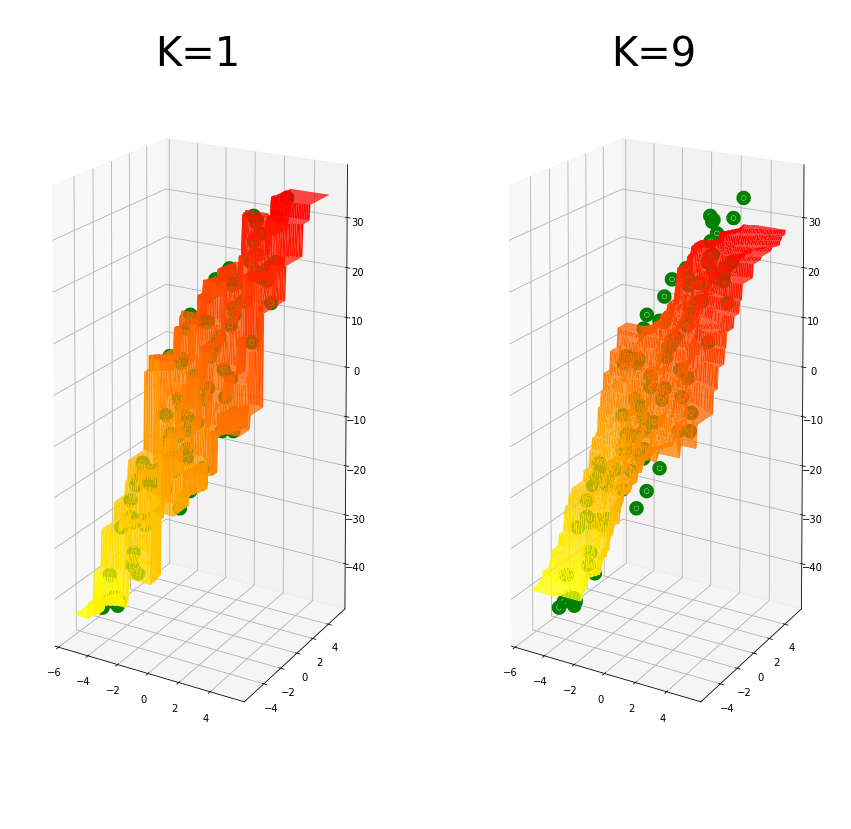

In [110]:
fig = plt.figure(figsize = (15,15))
k = 1
arg_min_k = np.argpartition(dist, np.argmin(dist, axis=1))[:, :k]
Z = np.mean(y[arg_min_k], axis = 1).reshape(100, 100)
ax = fig.add_subplot(1,2,1 , projection='3d')
ax.plot_surface(X1, X2, Z , cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.scatter(x1, x2, y, c='green', marker='o' , linewidths = 10 , alpha = 1.0)
ax.azim = 300
ax.elev = 10
plt.title("K=1" , fontsize = 40)
k = 9
arg_min_k = np.argpartition(dist, np.argmin(dist, axis=1))[:, :k]
Z = np.mean(y[arg_min_k], axis = 1).reshape(100, 100)
ax = fig.add_subplot(1,2,2 , projection='3d')
ax.plot_surface(X1, X2, Z , cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.scatter(x1, x2, y, c='green', marker='o' , linewidths = 10 , alpha = 1.0)

ax.azim = 300
ax.elev = 10
plt.title("K=9" , fontsize = 40)
plt.show()